## 프로젝트 개요 
=> 대출 신청자의 정보(소득, 신용점수, 고용 상태 등)를 바탕으로 대출 승인 여부(Approval)를 예측하는 분류 모델을 구축하고, 주요 영향을 미치는 요소들을 분석함.  

---

# 데이터 준비
=> 데이터셋은 지원자의 소득(Income),신용 점수(Credit Score),대출 금액(Loan Amount),  
 부채 소득 비율(DTI Ratio), 고용여부(Employment Status) 등의 속성을 사용하여 대출 승인(Approval) 여부를 예측하는 데이터이다.

- 수행 작업  
=>불필요한 Text 열 제거  
=>one-Hot-Encoding으로 수치

 유형으로 변환(타겟 열 Employment_Status을 이진 값으로 변환)  
=> input 데이터와 target 데이터를 나누어 넘파이 배열로 만듬

In [27]:
import pandas as pd
import numpy as np

data_url="C:\\Users\\채재헌\\machine_learning\\dataset\\loan_data.csv"
loan=pd.read_csv(data_url)

In [28]:
loan.head(10)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved
5,I need a loan to repair my car after an accident.,108236,404,50797,10.24,employed,Rejected
6,I need financial help to cover maternity and d...,110165,570,61217,7.12,employed,Approved
7,I need money to open a small bookstore and caf챕.,40656,600,21267,113.63,unemployed,Rejected
8,I need a loan to install a security system at ...,38233,346,8467,126.42,unemployed,Rejected
9,I need a loan to cover emergency expenses afte...,81024,403,19217,36.92,unemployed,Rejected


In [29]:
loan= loan.drop(columns=["Text"])
loan.head(10)

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556,581,8314,79.26,employed,Rejected
1,197392,389,111604,22.14,employed,Rejected
2,44561,523,34118,45.44,employed,Rejected
3,190363,729,118757,10.22,unemployed,Rejected
4,61853,732,19210,44.13,employed,Approved
5,108236,404,50797,10.24,employed,Rejected
6,110165,570,61217,7.12,employed,Approved
7,40656,600,21267,113.63,unemployed,Rejected
8,38233,346,8467,126.42,unemployed,Rejected
9,81024,403,19217,36.92,unemployed,Rejected


In [30]:
# - one-Hot Encoding으로 수치 유형으로 변환  
# 타겟 열 Employment_Status을 이진 값으로 변환
loan["Employment_Status"]=loan["Employment_Status"].map({"employed":0,"unemployed":1})


# 결과 확인
loan.head(10)

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556,581,8314,79.26,0,Rejected
1,197392,389,111604,22.14,0,Rejected
2,44561,523,34118,45.44,0,Rejected
3,190363,729,118757,10.22,1,Rejected
4,61853,732,19210,44.13,0,Approved
5,108236,404,50797,10.24,0,Rejected
6,110165,570,61217,7.12,0,Approved
7,40656,600,21267,113.63,1,Rejected
8,38233,346,8467,126.42,1,Rejected
9,81024,403,19217,36.92,1,Rejected


In [31]:
loan_input=loan[["Income","Credit_Score","Loan_Amount","DTI_Ratio","Employment_Status"]] ## input 데이터 설정
loan_target=loan["Approval"] # 타겟 데이터 설정

In [32]:
loan_target[:5]

0    Rejected
1    Rejected
2    Rejected
3    Rejected
4    Approved
Name: Approval, dtype: object

In [33]:
type(loan_input)

pandas.core.frame.DataFrame

In [34]:
loan_target=loan_target.to_numpy()
loan_input=loan_input.to_numpy()

In [35]:
type(loan_input)

numpy.ndarray

In [36]:
type(loan_target)

numpy.ndarray

---

# 데이터 분할

- 수행 작업  
=> 훈련데이터와 테스트 데이터로  input 값과 target 값으로 나눔

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train_input,test_input,train_target,test_target=train_test_split(loan_input,loan_target,random_state=42)

--- 

# 데이터 스케일링

- 수행 작업  
=>해당 훈련데이터와 테스트 데이터를 나눈 값을 스케일링 해준다.

In [39]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

ss.fit(train_input)

train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [40]:
train_scaled[:5]

array([[ 0.44466921,  0.93752667,  0.33114045, -0.01307517,  1.00144549],
       [ 0.31674229, -1.64311454,  0.84467927, -0.08792399,  1.00144549],
       [-0.54148815,  1.68654205,  0.58012984, -0.44948707,  1.00144549],
       [ 0.45337435,  1.01935188,  1.41887636, -0.72166458, -0.9985566 ],
       [ 0.90542279,  0.02486088,  1.90466021, -0.50515974,  1.00144549]])

---



# SGDClassifier를 사용하여 모델링  


1. 수행 작업 

1) 기본 SGDClassifier로 간단한 학습 및 평가한다.
2) partial_fit()을 활용한 반복 학습(에포크 가반 학습)한다.
3) 정확도 변화룰 시각화한다.
4) 최종 모델(max_iter=50) 학습 및 평가




---

### 기본 SGDClassifier로 간단한 학습 및 평가한다.

1) 기본 학습 결과

train acc: 0.9265555555555556  
test acc: 0.9316666666666666  
=> 10회 반복으로 빠르게 학습시킨 결과 과적합 없이 양호한 정확도를 보였음.  
=> 하지만 충분히 수렴하지 않은 상태일 가능성이 있으므로 추가 반복 필요성이 제기되었다.

In [41]:
from sklearn.linear_model import SGDClassifier

sc=SGDClassifier(loss="log_loss",max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9265555555555556
0.9316666666666666


c:\Anaconda\envs\mlbasic\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


---

### partial_fit()을 통한 300 에포크 반복 학습 결과 및 시각화 분석

2) partial_fit()을 통한 300 에포크 반복 학습 결과

=> 에포크마다 학습 및 테스트 정확도 변화 시각화로 확인하였다.

- 분석 내용:
- 학습 초기에는 train/test 정확도가 급격히 상승하며, 모델이 빠르게 학습됨
- 학습 100~150 에포크 이후부터 정확도 변화가 미세해지고 성능이 수렴해진다.
- 학습 110 에포크에는 과적합 없이 train/test 정확도가 거의 유사한 수준으로 안정화된다.
- 전반적으로 학습 안정성이 양호하고, 성능 유지력이 우수하다.


In [42]:
sc=SGDClassifier(loss='log_loss',random_state=42)

train_score=[]
test_score=[]

classes=np.unique(train_target)


for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

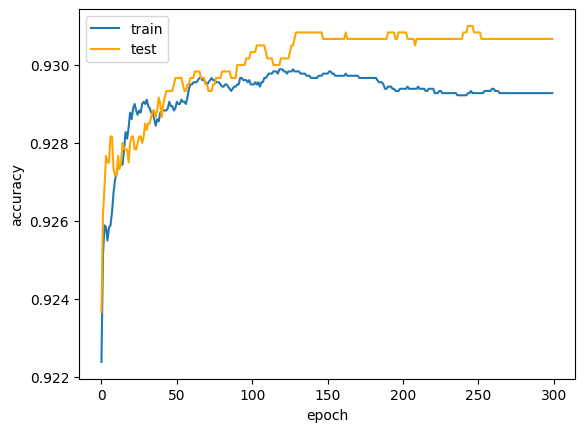

In [43]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label='train')
plt.plot(test_score, label='test',color="orange")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()



---

### 최종 학습 결과

* 결과

    train acc: 0.9294444444444444    
    test acc : 0.9303333333333333  

 반복 학습 결과를 반영하여  max_iter=110으로 모델을 훈련한 경우,  
 안정적으로 수렴되고 최적의 정확도를 기록함을 알 수 있다.


In [44]:
from sklearn.linear_model import SGDClassifier
train_score=[]
test_score=[]

classes=np.unique(train_target)

lr=SGDClassifier(loss="log_loss",max_iter=110,tol=None,random_state=42)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target),"\n")


0.9294444444444444
0.9303333333333333 



---

### 모델링 결과 및 성과 지표

* Accuracy: 0.9306666666666666
* Precision: 0.9597222222222223
* Recall: 0.9578217821782178
* F1 Score: 0.9587710604558969

=> 참고: pos_label="Rejected"로 설정하여 "Rejected" 클래스의 예측 성과를 집중 평가함

In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

pred=sc.predict(test_scaled)

acc=accuracy_score(test_target,pred)
precision = precision_score(test_target, pred, pos_label="Rejected")
recall = recall_score(test_target, pred, pos_label="Rejected")
f1 = f1_score(test_target, pred, pos_label="Rejected")

print("Accuracy:", acc)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)


Accuracy: 0.9306666666666666
Precision: 0.9597222222222223
Recall: 0.9578217821782178
F1 Score: 0.9587710604558969


---


## 1. 성과에 영향을 미친 주요 요소 분석

### 1) 모델 성능 분석
**정확도 93.06%**로 대부분의 샘플을 올바르게 예측하였다.

**정밀도(95.9%)**와 재현율(97.5%) 모두 높게 나타나, "Rejected" 샘플을 잘못 예측하거나 놓치는 경우가 매우 적었다.

F1-Score가 0.95으로, Precision과 Recall 간의 균형이 매우 우수한것을 볼 수 있다.

### 2) 중요한 영향 요소

* SGDClassifier는 확률적 경사 하강법(Stochastic Gradient Descent) 기반으로 빠른 학습이 가능하며, 특히 대규모 데이터에서 효율적이다.

* StandardScaler를 통한 정규화가 모델의 수렴과 예측 정확도 향상에 큰 역할을 했다.

* SGD는 하이퍼파라미터 튜닝에 민감하지만, 이번 분석에서는 기본값으로도 높은 성능을 기록하였다.

* 분류 기준인 "Rejected" 라벨의 불균형 여부가 성능에 영향을 미칠 수 있지만, 모델이 해당 클래스를 잘 예측함으로써 신뢰도 높은 결과를 도출하였다.





## 2. 결론

SGDClassifier는 간단하면서도 효율적인 분류 모델로, 본 데이터셋에서 "Rejected" 클래스를 효과적으로 예측하였다. 재현율과 정밀도가 모두 높아 실제 업무(예: 신청 거절 자동 분류 등)에 활용 가능성이 높으며, 향후 더 다양한 하이퍼파라미터 튜닝과 모델 비교를 통해 성능을 더욱 향상시킬 수 있다.




